### **Hand Written Digit Prediction - Classification Analysis**

 **The digits dataset consist of 8x8 pixel image attribute of the dataset stores 8x8 arrays of greyscale values for each image . We will use the first four images. The target attribute of the dataset stores the digit each image represents**

## **Import Library**

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

## **Import Data**

In [4]:
from sklearn.datasets import load_digits

In [5]:
df=load_digits()

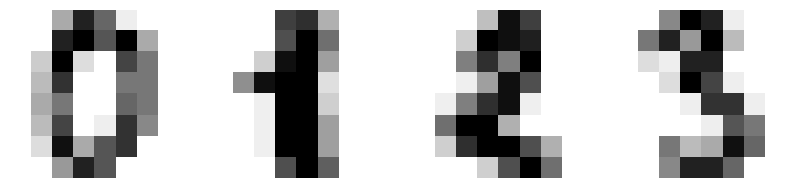

In [9]:
_,axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")

## **Data Preprocessing**

In [11]:
df.images.shape

(1797, 8, 8)

In [12]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [13]:
df.images[0].shape

(8, 8)

In [14]:
len(df.images)

1797

In [15]:
n_smples=len(df.images)
data=df.images.reshape((n_smples,-1))

In [16]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [17]:
data[0].shape

(64,)

In [18]:
data.shape

(1797, 64)

# **Scaling Image Data**

In [19]:
data.min()

0.0

In [20]:
data.max()

16.0

In [21]:
data=data/16

In [22]:
data.min()

0.0

In [23]:
data.max()

1.0

In [24]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## **Train Test Split**

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)

In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# **Random Forest Model**

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf=RandomForestClassifier()

In [30]:
rf.fit(x_train,y_train)

RandomForestClassifier()

# **Predict Test Data**

In [31]:
y_pred=rf.predict(x_test)

In [32]:
y_pred

array([7, 2, 3, 6, 6, 4, 2, 4, 1, 7, 7, 9, 9, 3, 5, 4, 4, 7, 7, 1, 2, 0,
       6, 2, 8, 2, 5, 9, 5, 6, 3, 0, 8, 0, 1, 4, 8, 2, 3, 1, 7, 1, 0, 8,
       0, 1, 9, 8, 5, 0, 6, 2, 2, 4, 2, 2, 8, 2, 2, 0, 1, 4, 1, 5, 1, 0,
       6, 8, 0, 7, 6, 5, 7, 0, 3, 1, 2, 0, 1, 9, 4, 3, 9, 3, 8, 4, 9, 7,
       7, 3, 8, 8, 5, 4, 6, 5, 4, 7, 6, 5, 1, 2, 1, 5, 9, 3, 9, 6, 1, 7,
       5, 8, 7, 2, 4, 2, 9, 4, 3, 0, 9, 6, 5, 4, 0, 3, 1, 2, 7, 5, 9, 6,
       1, 2, 4, 0, 3, 6, 3, 3, 3, 5, 4, 7, 7, 9, 0, 6, 1, 5, 2, 1, 1, 0,
       5, 6, 1, 6, 1, 6, 4, 3, 8, 5, 6, 3, 8, 3, 8, 2, 0, 7, 3, 6, 1, 5,
       0, 9, 1, 3, 0, 1, 1, 4, 9, 3, 8, 4, 4, 4, 9, 4, 9, 2, 9, 3, 5, 2,
       5, 8, 1, 1, 7, 3, 3, 3, 7, 8, 0, 1, 5, 4, 9, 3, 8, 2, 2, 7, 0, 4,
       3, 6, 1, 9, 2, 6, 3, 2, 0, 6, 8, 8, 8, 5, 0, 5, 6, 2, 8, 9, 7, 5,
       8, 4, 1, 3, 6, 0, 7, 1, 0, 8, 1, 7, 5, 4, 2, 9, 3, 0, 6, 4, 5, 7,
       4, 4, 3, 7, 3, 9, 7, 3, 5, 6, 8, 8, 0, 6, 8, 9, 2, 1, 7, 4, 9, 1,
       0, 9, 2, 9, 2, 5, 0, 6, 7, 4, 2, 1, 8, 5, 9,

# **Model Accuracy**

In [33]:
from sklearn.metrics import confusion_matrix,classification_report

In [34]:
confusion_matrix(y_test,y_pred)

array([[53,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 59,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 57,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  0,  0,  0,  0,  1,  1],
       [ 1,  0,  0,  0, 53,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 48,  1,  0,  0,  0],
       [ 1,  1,  0,  0,  1,  1, 48,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  2],
       [ 0,  1,  0,  0,  1,  0,  0,  1, 50,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 46]])

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.95      1.00      0.98        59
           2       1.00      0.98      0.99        58
           3       0.98      0.96      0.97        56
           4       0.95      0.98      0.96        54
           5       0.96      0.98      0.97        49
           6       0.98      0.92      0.95        52
           7       0.98      0.96      0.97        56
           8       0.98      0.93      0.95        54
           9       0.92      0.96      0.94        48

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

